# DS2500 Project 1 Age & Drug Use

by: Lesrene Browne <3

## Intro

How high were people in 2015?

This project will focus on drug consumption in 2015. I will be investigating what drugs were most common, what drugs were used most frequently and what types of people were taking the most common drugs (personality-wise).


In [20]:
# uses line magic to capture Matplotlib plots and render them in the cell output
%matplotlib inline

# all the packages I plan to use
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# the relative & absolute path for the dataset I will be using

DRUGS1885 = "drug_consumption_1885.csv"
#DRUGS1885 = "/Users/lesrene/Desktop/Spring 2022/Datasets SPring 2022/drug_consumption_1885.csv"

The database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day. Database contains 18 classification types. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

In [2]:
# reads in the dataset
df1885_real = pd.read_csv(DRUGS1885)

Dataset Citation:

E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, "The Five Factor Model of personality and evaluation of drug consumption risk.," arXiv https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#, 2015

Dataset Work I Referenced Occasionally:

Sands, J. (2021, January 16). Drug Consumption Dataset Data Analysis | 💭Jonathan Blog. Jonathan Blog. Retrieved March 9, 2022, from https://jonathan-sands.com/eda/tabular/multilabel/pandas/seaborn/matplotlib/2021/01/16/Drug-consumption-analysis.html 

### Dataset Prep

In [3]:
# what does the data set look like? what might I need to address when cleaning the data?

# gets the first 10 rows of df1885_real
df1885_real.head(10)

1  0.49788  0.48246  -0.05921  0.96082  0.12600  0.31287  -0.57545  \
0   2 -0.07854 -0.48246   1.98437  0.96082 -0.31685 -0.67825   1.93886   
1   3  0.49788 -0.48246  -0.05921  0.96082 -0.31685 -0.46725   0.80523   
2   4 -0.95197  0.48246   1.16365  0.96082 -0.31685 -0.14882  -0.80615   
3   5  0.49788  0.48246   1.98437  0.96082 -0.31685  0.73545  -1.63340   
4   6  2.59171  0.48246  -1.22751  0.24923 -0.31685 -0.67825  -0.30033   
5   7  1.09449 -0.48246   1.16365 -0.57009 -0.31685 -0.46725  -1.09207   
6   8  0.49788 -0.48246  -1.73790  0.96082 -0.31685 -1.32828   1.93886   
7   9  0.49788  0.48246  -0.05921  0.24923 -0.31685  0.62967   2.57309   
8  10  1.82213 -0.48246   1.16365  0.96082 -0.31685 -0.24649   0.00332   
9  11 -0.07854  0.48246   0.45468  0.96082 -0.31685 -1.05308   0.80523   

   -0.58331  -0.91699  ...  CL0.4  CL0.5  CL0.6 CL0.7 CL0.8 CL0.9 CL0.10  \
0   1.43533   0.76096  ...    CL4    CL0    CL2   CL0   CL2   CL3    CL0   
1  -0.84732  -1.62090  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL1   
2  -0.01928   0.59042  ...    CL0    CL0    CL2   CL0   CL0   CL0    CL0   
3  -0.45174  -0.30172  ...    CL1    CL0    CL0   CL1   CL0   CL0    CL2   
4  -1.55521   2.03972  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL0   
5  -0.45174  -0.30172  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL0   
6  -0.84732  -0.30172  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL0   
7  -0.97631   0.76096  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL0   
8  -1.42424   0.59042  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL0   
9  -1.11902  -0.76096  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL0   

  CL2.2 CL0.11 CL0.12  
0   CL4    CL0    CL0  
1   CL0    CL0    CL0  
2   CL2    CL0    CL0  
3   CL2    CL0    CL0  
4   CL6    CL0    CL0  
5   CL6    CL0    CL0  
6   CL0    CL0    CL0  
7   CL6    CL0    CL0  
8   CL6    CL0    CL0  
9   CL2    CL0    CL1  

[10 rows x 32 columns]

In [4]:
# tells index # , column name, # & type of data for each column
df1885_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         1884 non-null   int64  
 1   0.49788   1884 non-null   float64
 2   0.48246   1884 non-null   float64
 3   -0.05921  1884 non-null   float64
 4   0.96082   1884 non-null   float64
 5   0.12600   1884 non-null   float64
 6   0.31287   1884 non-null   float64
 7   -0.57545  1884 non-null   float64
 8   -0.58331  1884 non-null   float64
 9   -0.91699  1884 non-null   float64
 10  -0.00665  1884 non-null   float64
 11  -0.21712  1884 non-null   float64
 12  -1.18084  1884 non-null   float64
 13  CL5       1884 non-null   object 
 14  CL2       1884 non-null   object 
 15  CL0       1884 non-null   object 
 16  CL2.1     1884 non-null   object 
 17  CL6       1884 non-null   object 
 18  CL0.1     1884 non-null   object 
 19  CL5.1     1884 non-null   object 
 20  CL0.2     1884 non-null   obje

df1885_real doesn't have column names so I'm going to have to add them. I will be dropping columns I don't want to reference as well. Also, the data in df1885_real is recorded nominally rather than ordinally which makes it easier to work with to make certain plots but harder to understand in the real world, so I will change them to values that are more easily understood. (I knew what each nominal value mapped to because the website where I got the data from provided translations.) Some rows are being dropped as well because those who claimed to take the made-up drug Semeron were lying. 

*Note about the Personality Tests used:

The NEO FFI includes self-descriptive statements that participants respond to using a 1 (strongly disagree) to 5 (strongly agree) scale. Scores for each domain are calculated by summing the 12 item responses. 

High NScore = emotionally reactive, EScore = sociable, OScore = curious/have broad interests, AScore = happy to defer to others/think others have good intentions, CScore = very self-disciplined 

In [5]:
# data cleaning !

# makes a copy of the data that I will make changes to
df1885 = df1885_real.copy()

# drops coulumns I don't plan to reference
df1885.drop(df1885.columns[[0,12]], axis = 1, inplace = True)

# names columns
df1885.columns = [
    'Age', 
    'Gender',
    'Education',
    'Country',
    'Ethnicity', 
    'Neuroticism Score',
    'Extraversion Score', 
    'Openness Score',
    'Agreeableness Score',
    'Conscientiousness Score',
    'Impulsive Score',
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption']

# getting rid of the liars then dropping the Semeron column altogether
df1885.drop(df1885[df1885['Fictitious drug Semeron consumption'] != 'CL0'].index, inplace = True)
df1885.drop(['Fictitious drug Semeron consumption'], axis = 1, inplace = True)

# changing nominal to ordinal

drugs = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Volatile substance abuse consumption']

# translates frequency of use for each drug
for i in drugs:
    df1885[i] = df1885[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
    
# translates age ranges    
df1885['Age'] = df1885['Age'].map({-0.95197: '18-24', -0.07854: '25-34', 0.49788: '35-44', 1.09449: '45-54', \
                                   1.82213: '55-64', 2.59171: '65+'})
    
# translates recorded genders
df1885['Gender'] = df1885['Gender'].map({0.48246:'F', -0.48246: 'M'})
    
# translates education levels
df1885['Education'] = df1885['Education'].map({-2.43591: 'Left school before 16 years', -1.73790: 'Left school at 16 years', \
                                           -1.43719: 'Left school at 17 years', -1.22751: 'Left school at 18 years', \
                                           -0.61113: 'Some college university no certificate degree', \
                                           -0.05921: 'Professional certificate diploma', 0.45468: 'University degree', \
                                           1.16365: 'Masters degree', 1.98437: 'Doctorate degree'})

# translates country 
df1885['Country'] = df1885['Country'].map({-0.09765: 'Australia', 0.24923: 'Canada', -0.46841: 'New Zealand',\
                                           -0.28519: 'Other', 0.21128: 'Republic of Ireland',0.96082: 'UK'\
                                           ,-0.57009: 'USA'})
# translates ethnicity
df1885['Ethnicity'] = df1885['Ethnicity'].map({-0.50212: 'Asian', -1.10702: 'Black', 1.90725: 'Mixed-Black/Asian', 0.12600: 'Mixed-White/Asian', -0.22166: 'Mixed-White/Black', 0.11440: 'Other', -0.31685: 'White'})

# translates neuroticism
df1885['Neuroticism Score'] = df1885['Neuroticism Score'].map({-3.46436: 12, -3.15735: 13, -2.75696: 14, -2.52197: 15,\
                                                              -2.42317: 16,  -2.34360: 17, -2.21844: 18, -2.05048 :19,\
                                                              -1.86962: 20, -1.69163: 21, -1.55078: 22, -1.43907: 23, \
                                                              -1.32828: 24, -1.19430: 25, -1.05308: 26, -0.92104: 27, \
                                                              -0.79151: 28, -0.67825: 29,  -0.58016: 30, -0.46725: 31, \
                                                              -0.34799: 32, -0.24649: 33, -0.14882: 34, -0.05188: 35, \
                                                              0.04257: 36, 0.13606: 37, 0.22393: 38, 0.31287: 39, \
                                                              0.41667: 40, 0.52135: 41, 0.62967: 42, 0.73545: 43, \
                                                              0.82562: 44,  0.91093: 45, 1.02119: 46, 1.13281: 47, \
                                                              1.23461: 48, 1.37297: 49, 1.49158: 50, 1.60383: 51, \
                                                              1.72012: 52, 1.83990: 53, 1.98437: 54, 2.12700: 55, \
                                                              2.28554: 56, 2.46262: 57, 2.61139: 58, 2.82196: 59, \
                                                              3.27393: 60})

# translates extraversion
df1885['Extraversion Score'] = df1885['Extraversion Score'].map({-3.27393: 16, -3.00537 : 18, -2.72827: 19, -2.53830: 20, \
                                                                -2.44904: 21, -2.32338: 22, -2.21069: 23, -2.11437: 24, \
                                                                -2.03972: 25, -1.92173: 26, -1.76250: 27, -1.63340: 28, \
                                                                -1.50796: 29, -1.37639: 30, -1.23177: 31, -1.09207: 32, \
                                                                -0.94779: 33, -0.80615: 34, -0.69509: 35, -0.57545: 36, \
                                                                  -0.43999: 37,  -0.30033: 38, -0.15487: 39, 0.00332: 40, \
                                                                  0.16767: 41,  0.32197: 42, 0.47617: 43, 0.63779: 44, \
                                                                  0.80523: 45, 0.96248: 46, 1.11406: 47, 1.28610: 48, \
                                                                  1.45421: 49, 1.58487: 50, 1.74091: 51, 1.93886: 52, \
                                                                  2.12700: 53, 2.32338: 54, 2.57309: 55, 2.85950: 56, \
                                                                  3.00537: 58, 3.27393: 59})

# translates openness to experience
df1885['Openness Score'] = df1885['Openness Score'].map({-3.27393: 24, -2.85950 : 26, -2.63199: 28, -2.39883: 29, -2.21069: 30, \
                                                        -2.09015: 31, -1.97495: 32, -1.82919: 33, -1.68062: 34, -1.55521: 35, \
                                                        -1.42424: 36, -1.27553: 37, -1.11902: 38, -0.97631: 39,  -0.84732: 40, \
                                                        -0.71727: 41,  -0.58331: 42, -0.45174: 43, -0.31776: 44, -0.17779: 45, \
                                                        -0.01928 : 46, 0.14143: 47,  0.29338: 48, 0.44585: 49, 0.58331: 50, \
                                                        0.72330: 51, 0.88309: 52, 1.06238: 53, 1.24033: 54, 1.43533: 55, \
                                                        1.65653: 56, 1.88511: 57, 2.15324: 58, 2.44904: 59, 2.90161: 60})

# translates agreeableness
df1885['Agreeableness Score'] = df1885['Agreeableness Score'].map({-3.46436: 12, -3.15735: 16, -3.00537: 18, -2.90161 : 23, \
                                                                  -2.78793: 24, -2.70172: 25, -2.53830: 26,  -2.35413: 27,\
                                                                    -2.21844: 28, -2.07848: 29, -1.92595: 30, -1.77200: 31, \
                                                                  -1.62090: 32, -1.47955: 33, -1.34289: 34, -1.21213: 35, \
                                                                  -1.07533: 36, -0.91699: 37, -0.76096: 38, -0.60633: 39, \
                                                                  -0.45321: 40, -0.30172: 41, -0.15487: 42, -0.01729: 43, \
                                                                  0.13136: 44, 0.28783: 45, 0.43852: 46, 0.59042: 47, \
                                                                    0.76096: 48, 0.94156: 49, 1.11406: 50, 1.2861: 51, \
                                                                    1.45039: 52, 1.61108: 53, 1.81866: 54, 2.03972: 55, \
                                                                  2.23427: 56, 2.46262: 57, 2.75696: 58, 3.15735: 59, 3.46436: 60})

# translates conscientiousness
df1885['Conscientiousness Score'] = df1885['Conscientiousness Score'].map({-3.46436: 17, -3.15735: 19, -2.90161: 20, -2.72827: 21, \
                                                                          -2.57309: 22, -2.42317: 23, -2.30408: 24, -2.18109: 25, \
                                                                          -2.04506: 26, -1.92173: 27, -1.78169: 28, -1.64101: 29, \
                                                                              -1.51840: 30, -1.38502: 31, -1.25773: 32, -1.13788: 33, \
                                                                                  -1.01450: 34, -0.89891:35, -0.78155: 36, -0.65253: 37, \
                                                                                      -0.52745: 38, -0.40581: 39, -0.27607: 40, -0.14277: 41, \
                                                                                          -0.00665: 42, 0.12331: 43, 0.25953: 44, 0.41594:45, \
                                                                                              0.58489: 46, 0.7583: 47, 0.93949: 48, 1.13407:49, \
                                                                      1.30612: 50, 1.46191: 51, 1.63088: 52, 1.81175: 53, \
                                                                          2.04506: 54, 2.33337: 55, 2.63199: 56, 3.00537: 57, 3.46436: 59})

In [6]:
# calls new dataset with the # of cases & percent of total for each drug

#o = '/Users/lesrene/Desktop/Spring 2022/DS2500/proj 1/1885drugcases.csv'
o = '1885drugcases.csv'
occurrences = pd.read_csv(o)
occurrences.set_index('ID', inplace=True)

## Data Analysis

I will be making visualizations to understand the dataset as well as answer the questions I posed in the intro. 

### Demographic Analysis

These first plots will help me understand more about the demographics of the people in the dataset.

Text(0.5, 1.0, 'Age Distribution')

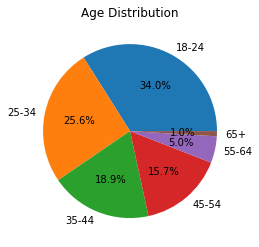

In [7]:
# Demographic Pie Charts

# ages

# gets a count of all unique values in the age column
age_counts = df1885['Age'].value_counts()
# makes the unique values the labels 
labels = age_counts.keys()

# makes a pie chart
plt.pie(age_counts, labels = labels, autopct='%1.1f%%')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Gender Distribution')

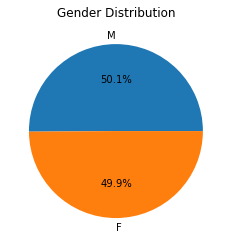

In [8]:
# genders

# gets a count of all unique values in the gender column
gender_counts = df1885['Gender'].value_counts()
# makes the unique values the labels 
labels = gender_counts.keys()

# makes a pie chart
plt.pie(gender_counts, labels = labels, autopct='%1.1f%%')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Education Levels Distribution')

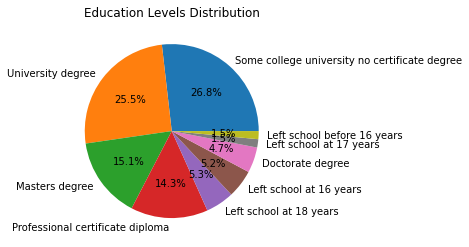

In [9]:
# education levels

# gets a count of all unique values in the education column
edu_counts = df1885['Education'].value_counts()
# makes the unique values the labels 
labels = edu_counts.keys()

# makes a pie chart
plt.pie(edu_counts, labels = labels, autopct='%1.1f%%')
plt.title('Education Levels Distribution')

Text(0.5, 1.0, 'Country Distribution')

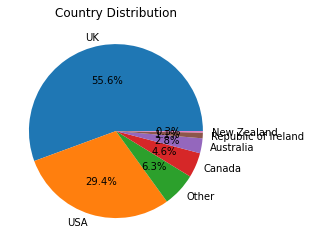

In [10]:
# countries

# gets a count of all unique values in the countries column
country_counts = df1885['Country'].value_counts()
# makes the unique values the labels 
labels = country_counts.keys()

# makes a pie chart
plt.pie(country_counts, labels = labels, autopct='%1.1f%%')
plt.title('Country Distribution')

Text(0.5, 1.0, 'Ethnicity Distribution')

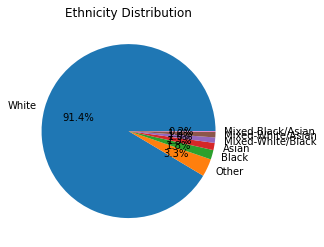

In [11]:
# ethnicities

# gets a count of all unique values in the ethnicities column
ethnic_counts = df1885['Ethnicity'].value_counts()
# makes the unique values the labels 
labels = ethnic_counts.keys()

# makes a pie chart
plt.pie(ethnic_counts, labels = labels, autopct='%1.1f%%')
plt.title('Ethnicity Distribution')

The distribution of ages and genders are fairly balanced but the distribution of education levels, countries and ethnicities are not. The researchers seemed to have taken data from people with higher levels of education. Most participants had at least some college/university or a degree of some kind. People with lower levels of education were underrepresented. The researchers also seemed to have polled people from the UK and the US disproportionately. Finally, the respondents were overwhelmingly white.

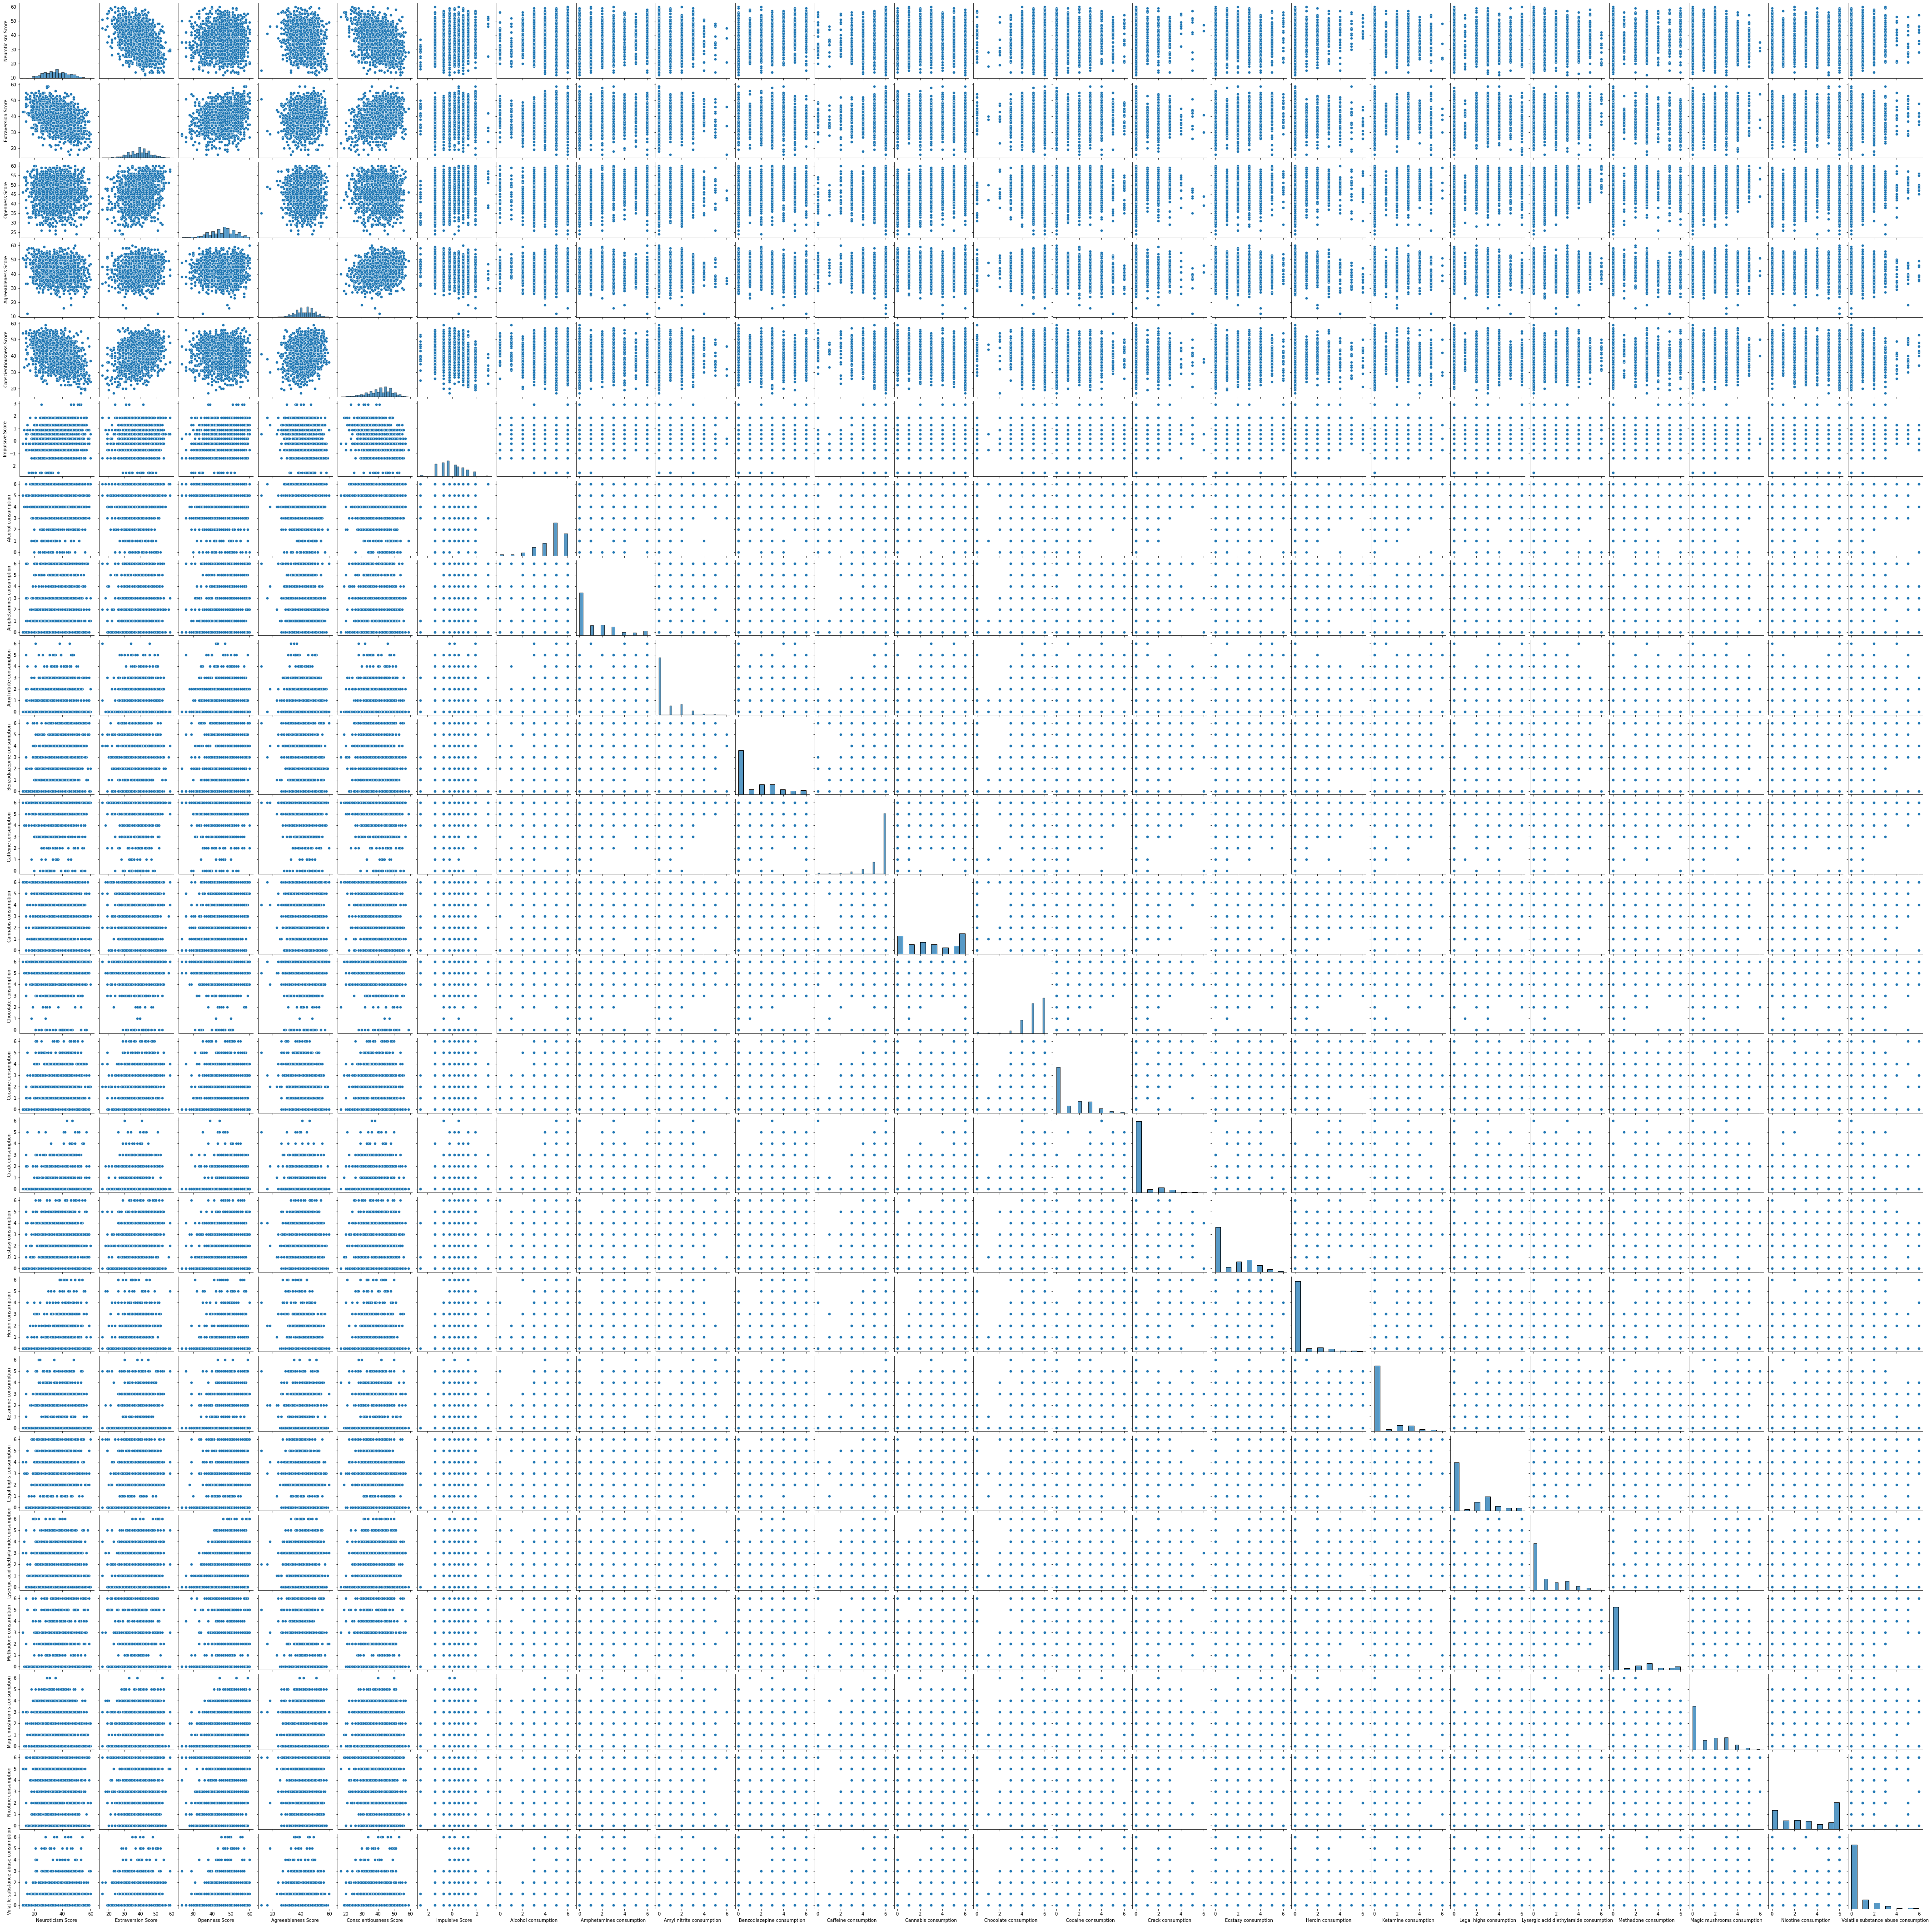

In [12]:
# Pairplots

# makes a pairplot
sns.pairplot(df1885)

I can see the relationship between every column this way. This was not as helpful as I thought it would be for this dataset however :(

### Answering My Questions

Text(0.5, 1.0, 'Most Common Drugs')

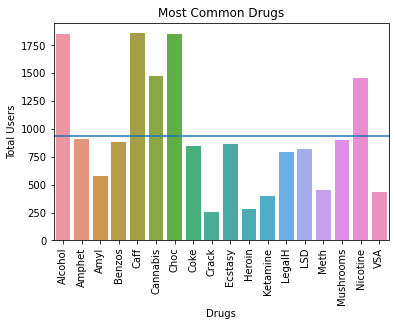

In [13]:
# what drugs were most common?

# bar graph showing total cases of use for each drug

# makes a dicionary that will contain the drug names and their total users
total_users = {}

# lists that will contain the drug names and total users per drug respectively
drugs_tu = []
totals_tu = []

# iterates through the row names in occurences csv
for ID in occurrences.index:
        # ignores row names that are ID or contain Percent in them 
        # since I am only interested in total cases atp
        if ID == 'ID':
            pass
        elif 'Percent' in ID:
            pass
        else:
            # calculates total cases by subtracting the respondents who claimed to never use
            # from the amount of total respondents 
            y = 1885 - occurrences.at[ID, 'CL0']
            # extracts drug name from row name by getting rid of the word Cases at the end 
            ID_df = ID.replace(' Cases', '')
            # appends drug name and calculated total users to their respective lists 
            drugs_tu.append(ID_df)
            totals_tu.append(y)
            
# adds the two lists to the dictionary with 'Drugs' & "Total Users" as keys             
total_users['Drugs'] = drugs_tu
total_users['Total Users'] = totals_tu
              
# makes a dataframe out of the resulting dictionary              
total_users_df = pd.DataFrame(total_users)

# finds the average of the total users for each drug
avg_users = round(total_users_df['Total Users'].mean())   

# makes a bar graph with a horizontal line indicating average total users
bar1 = sns.barplot(x= 'Drugs', y= 'Total Users', data = total_users_df)
plt.xticks(rotation = 90)
bar1.axhline(avg_users)
plt.title('Most Common Drugs') 

According to this bar graph the most common drugs were alcohol, caffeine, and chocolate. Cannabis and nicotine were also above the average.

Text(0.5, 1.0, 'Most Common Regularly Used Drugs')

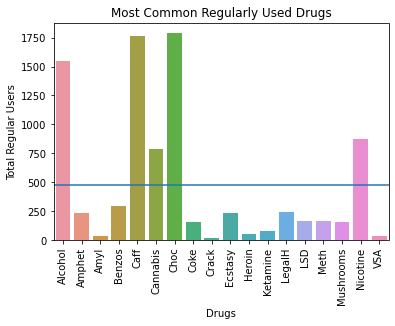

In [14]:
# bar graph showing total cases of monthly+weekly+daily use for each drug

# makes a dicionary that will contain the drug names and their total users
total_reg_users = {}

# lists that will contain the drug names and total users per drug respectively
drugs_tru = []
totals_tru = []

# iterates through the row names in occurences csv
for ID in occurrences.index:
        # ignores row names that are ID or contain Percent in them 
        # since I am only interested in total cases atp
        if ID == 'ID':
            pass
        elif 'Percent' in ID:
            pass
        else:
            # calculates cases of regular use by subtracting the respondents who claimed 
            # to never use, as well as those who claimed to have used more than a month ago
            # from the amount of total respondents 
            y = 1885 - occurrences.at[ID, 'CL0']
            y -= occurrences.at[ID, 'CL1']
            y -= occurrences.at[ID, 'CL2']
            y -= occurrences.at[ID, 'CL3']
            # extracts drug name from row name by getting rid of the word Cases at the end 
            ID_df = ID.replace(' Cases', '')
            # appends drug name and calculated regular users to their respective lists
            drugs_tru.append(ID_df)
            totals_tru.append(y)
            
# adds the two lists to the dictionary with 'Drugs' & "Total Users" as keys              
total_reg_users['Drugs'] = drugs_tru
total_reg_users['Total Regular Users'] = totals_tru
              
# makes a dataframe out of the resulting dictionary              
total_regusers_df = pd.DataFrame(total_reg_users)

# finds the average of the total regular users for each drug
avg_regusers = round(total_regusers_df['Total Regular Users'].mean()) 

# makes a bar graph with a horizontal line indicating average regular users              
bar2 = sns.barplot(x= 'Drugs', y= 'Total Regular Users', data = total_regusers_df) 
plt.xticks(rotation= 90)
bar2.axhline(avg_regusers) 
plt.title('Most Common Regularly Used Drugs')

The most common regularly used drugs were the same as the most common drugs but with a bigger margin.

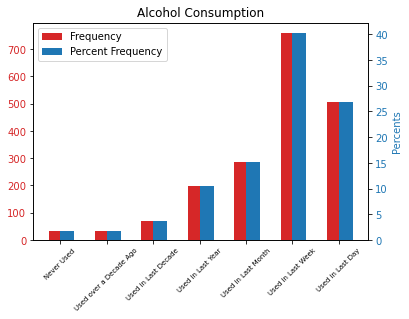

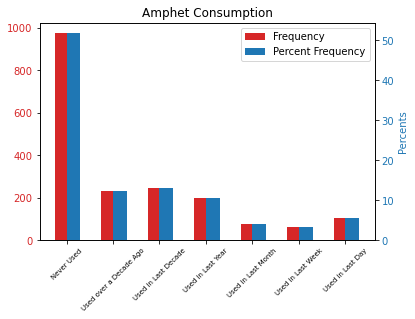

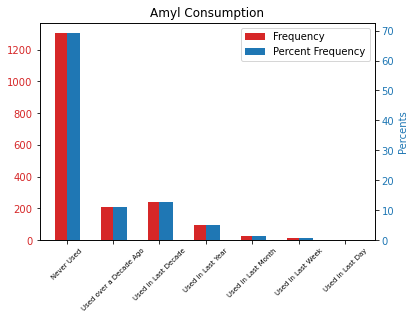

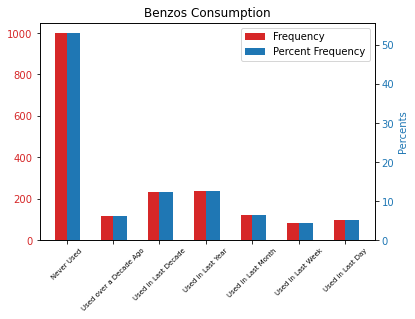

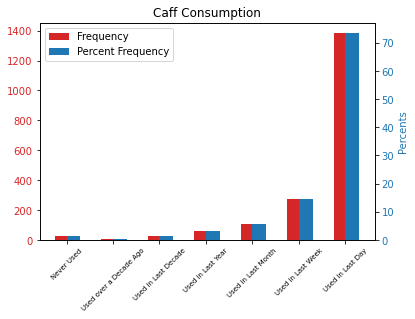

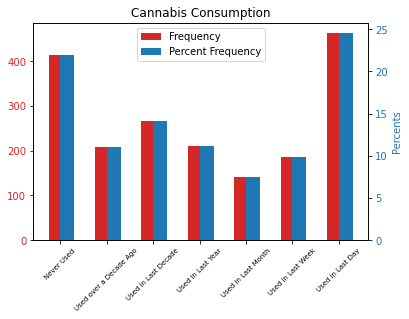

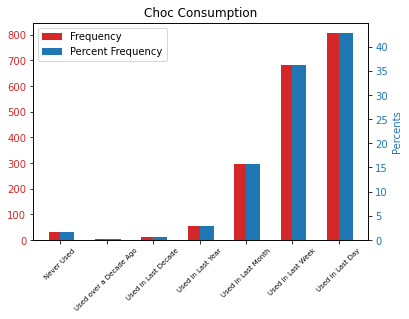

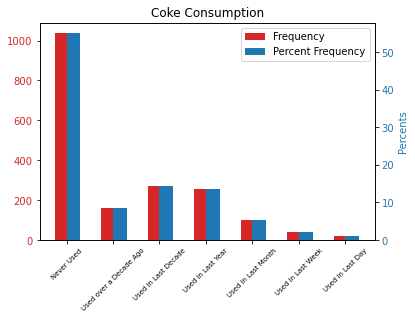

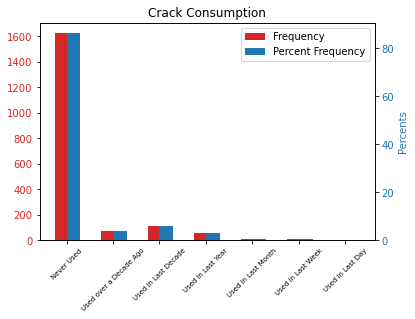

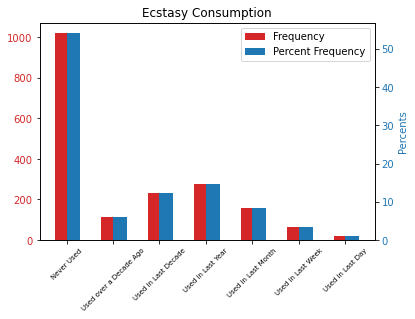

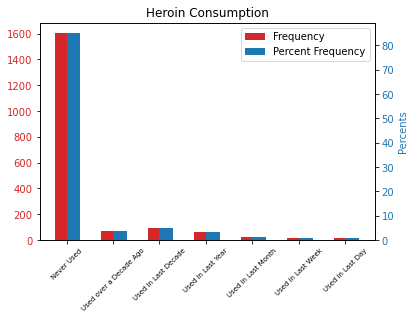

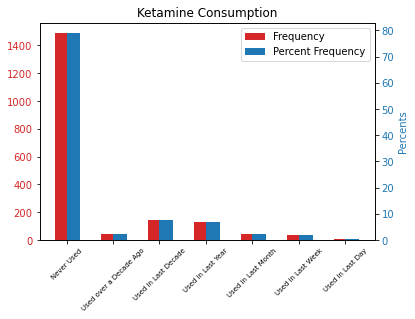

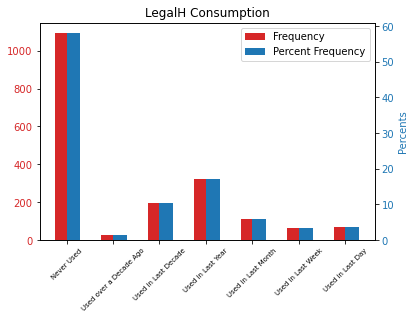

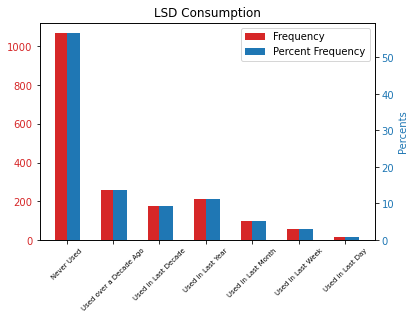

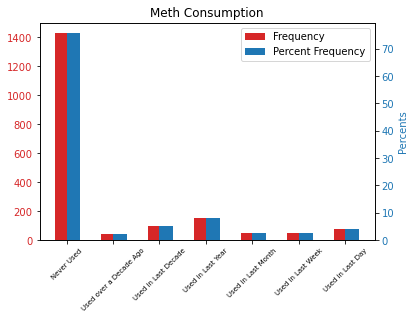

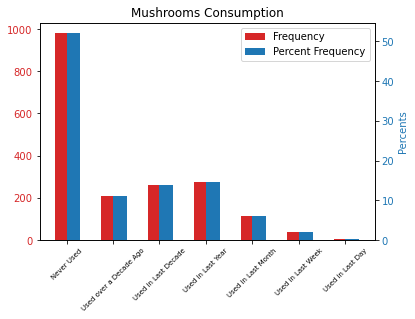

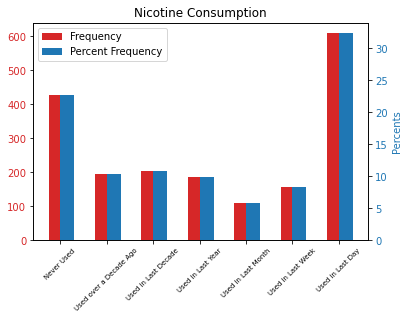

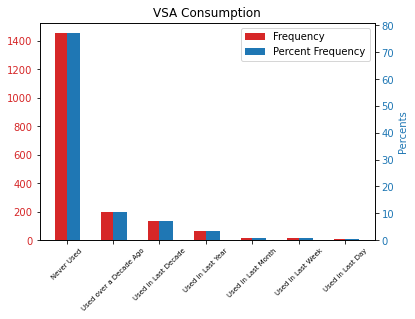

In [18]:
# what drugs were used most frequently?

# bar graphs showing raw cases/percent amount of respondents in each class for each drug

# makes a list of frequency classifications
classes = ["Never Used", "Used over a Decade Ago", "Used in Last Decade", \
           "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"]

# iterates throw the drug names in the drug total users list 
# (since this list) had the drug names seperated from other strings already
for drug in drugs_tu:
    # attaches the strings 'Cases' and 'Percents' to the drug names 
    # in count_name & percent_name respectively
    count_name = drug + ' Cases'
    percent_name = drug + ' Percent'
    # iterates through rows in occurences
    for index, rows in occurrences.iterrows():
        # checks to see if row name is the same as count_name
        if count_name == index:
            # makes a count list with the current drug's name and appends all values 
            # in that row to the list one by one
            label1 = drug + '_countlst'
            globals()[label1] = []
            globals()[label1].append(rows.CL0)
            globals()[label1].append(rows.CL1)
            globals()[label1].append(rows.CL2)
            globals()[label1].append(rows.CL3)
            globals()[label1].append(rows.CL4)
            globals()[label1].append(rows.CL5)
            globals()[label1].append(rows.CL6)
        # checks to see if row name is the same as percent_name
        elif percent_name == index:
            # makes a percent list with the current drug's name and appends all values 
            # in that row to the list one by one
            label2 = drug + '_percentlst'
            globals()[label2] = []
            globals()[label2].append(rows.CL0)
            globals()[label2].append(rows.CL1)
            globals()[label2].append(rows.CL2)
            globals()[label2].append(rows.CL3)
            globals()[label2].append(rows.CL4)
            globals()[label2].append(rows.CL5)
            globals()[label2].append(rows.CL6)
        # passes the row name if it isnt either count_name or percent_name
        else:
            pass
    
    # makes a dictionary w/ the current drug's name
    label = drug + '_dict'
    globals()[label] = {}
    
    # adds the three lists to the dictionary with 'Classes', 'Counts', & 'Percents' as keys
    globals()[label]['Classes'] = classes
    globals()[label]['Counts'] = globals()[label1]
    globals()[label]['Percents'] = globals()[label2]
    
    # makes a dataframe out of the resulting dictionary 
    df = pd.DataFrame(globals()[label])
    
    
    # makes a bar plot with two different-colored y axes (counts & percents)
    # that share an x axis (classes)
    
    ax1 = plt.subplot(1,1,1) # creates the plot
    color = 'tab:red'
    count = ax1.bar(df['Classes'], df['Counts'], width = 0.5, color = color, align = 'center')
    plt.xticks(rotation = 45, size = 'x-small')
    ax1.tick_params(axis='y', labelcolor=color)
        
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        
    color = 'tab:blue'
    ax2.set_ylabel('Percents', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)
    percent = ax2.bar(df['Classes'], df['Percents'], width = 0.3, color = color, align = 'edge')
    plt.legend([count, percent],['Frequency', 'Percent Frequency'])
    

    plt.title(drug + ' Consumption')
    plt.show()

Most respondents were alcohol users and used it frequently, with about 40% using it within the last week and about 25% using it within the last day. Almost 50% of respondents were not amphetamine users but of those who had used, about 10% used over a decade ago, about 10% used within in the last decade, and about 10% used within the last year. 70% of respondents were not amyl nitrite users. 10% said they used it over a decade ago and about the same said they used it within the last decade. A little over 50% of respondents claimed to never have used benzodiazepine but about 10% said they had taken it within the last decade, about the same said they took within the last year. About 5% said they had taken benzos in the last month and about the same said used it within the week and within the day. Most respondents were caffeine users and used it frequently, with almost 75% saying they used it within the last day and about 15% saying they used it within the last week. Cannabis had some of the most diverse numbers. About 20% of respondents said they never used it before, about 10% said they had used it over a decade ago, used it in the last year, or in the last week, about 7% said they used it with in the last month, and finally almost 25% of respondents said they used cannabis within the last day. Most respondents were frequent chocolate users with about 45% respondents saying they used it within the last day, 35% saying they used it within the last week and 15% saying they used it within the last month. Most respondents had nver used cocaine with about 57% saying they never used it. About 15% claimed to have used it within the last decade and within the last year. Barely any respondents claimed to have used crack. About 85% of respondents said they never used it at all. About 55% of respondents said they never used ecstasy but a little over 10% said they had tried it within the last decade or within the last year. Similar to crack, about 85% of respondents claimed they never used heroin. Similarly, 80% of respondents said they tried ketamine. About 60% of respondents said they never used legal highs but about 10% said they used in the last decade and about 15% said they used within the last year. About 55% of respondents said they never used LSD but about 10% said they used over a decade ago, used within the decade, and within the last year. About 75% of respondents claimed to have never used meth and about 10% claimed to have used it it within the last year. About 50% of the respondents said they never used shrooms but over 10% said they used it over a decade ago, within the last decade, and within the last year. Like cannabis, nictoine had very diverse numbers. About 20% nver used it before, while about 10% used it over a decade ago, within the last decade, within the last year, and within the last week. About 5% said they had used it within the last month and about 35% said they used it within the last day. Finally, most respondents never abused volatile substances as about 80% of them said they never used them.    

In [57]:
# what types of people were taking the most common drugs?

def violin(col_name, df1885 = df1885):
    '''
    Makes a violin plot for the column name provided & 
    every personlity trait in the dataframe 
    
    Parameters
    ----------
    col_name : string
        a name of a drug consumption column in df1885
    df1885 : dataframe
        data containing drug consumption frequencies \
            and demographic attributes

    Returns
    -------
    Violin Plot

    '''
    
    # a list of the personality traits in the df except impulsive
    personality_traits = [
        'Neuroticism Score',
        'Extraversion Score', 
        'Openness Score',
        'Agreeableness Score',
        'Conscientiousness Score'
        ]
    
    # makes a seprate list for impulsive since it has a different avg score
    impulsive_trait = ['Impulsive Score']
    
    # iterates through personality trait list
    for trait in personality_traits:
        # instantiates a seperate plot
        plt.figure()
        # makes the violin plot with the col_name as x and the current trait as y
        v = sns.violinplot(x = col_name, y = trait, data = df1885)
        # adds a horizontal line indicating average score on the scale
        v.axhline(38)
        # finds the pearson r correlation (and r^2) between the col_name as the current trait 
        r = pearsonr(x = df1885[col_name], y = df1885[trait])
        r2 = r[0]**2
        r = round(r[0], 4) 
        r2 = round(r2, 4) * 100
        
        # writes the r and r^2 on the side of the graph
        plt.figtext(0.93, 0.765, ''' r = '''+str(r)+ '''\n'''+'''r^2 = '''+str(r2)+'''%''', fontsize = 12, fontname = 'monospace', color = '#283655')
        
        # gets just the trait name then names the graph
        trait_name = trait.replace(' Score', '')
        plt.title(col_name + ' vs ' + trait_name)
    
    # iterates through the one item in impulsive trait list
    for trait in impulsive_trait:
        # instantiates a seperate plot
        plt.figure()
        # makes the violin plot with the col_name as x and the impulsive trait as y
        v = sns.violinplot(x = col_name, y = trait, data = df1885)
        # adds a horizontal line indicating average score on the scale
        v.axhline(1.3)
        # finds the pearson r correlation (and r^2) between the col_name as the impulsive trait
        r = pearsonr(x = df1885[col_name], y = df1885[trait])
        r2 = r[0]**2
        r = round(r[0], 4) 
        r2 = round(r2, 4) * 100
        
        # writes the r and r^2 on the side of the graph
        plt.figtext(0.93, 0.765, ''' r = '''+str(r)+ '''\n'''+'''r^2 = '''+str(r2)+'''%''', fontsize = 12, fontname = 'monospace', color = '#283655')
        
        # names the graph
        plt.title(col_name + ' vs Impulsive')   
      

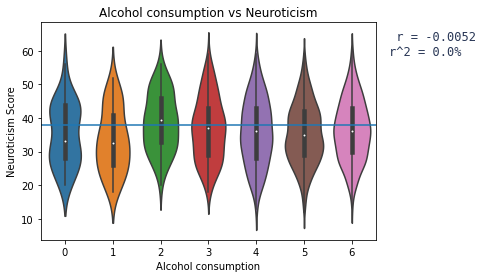

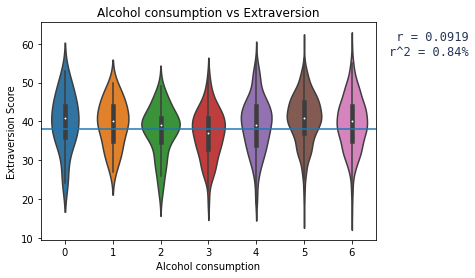

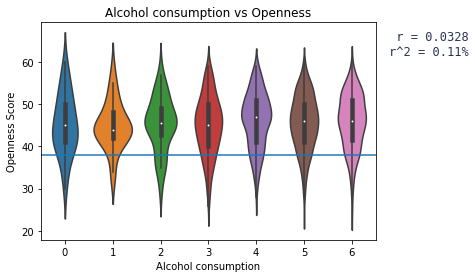

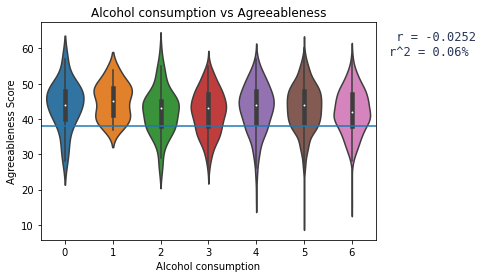

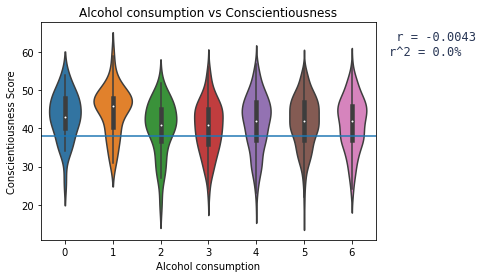

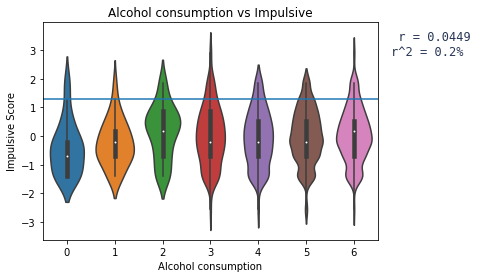

In [58]:
# calls the violin function to make plots for Alc consumption
alc = violin('Alcohol consumption')

People who participated in the study were below average on neuroticism. People who participated in the study were average on extraversion. People who participated in the study were generally more open than average. People who participated in the study were generally more agreeable than average. People who participated in the study were slightly more conscientious than average. People who participated in the study were much less impulsive than average.

For people that drank more frequently, the concentration of neuroticism scores were more spread out but most concentrated around 40 or 35. The correlation was negative and very weak and more frequent alcohol use accounted for 0% of the neroticism score. People who drank more frequently had a very spread out concentration of extraversion scores but a little more concentrated higher with scores around 41 or 42. The correlation was positive and very weak and frequent alcohol use accounted for .84% of the extraversion score. People who drank more frequently concentration of openness scores were spread out but overall above average. The correlation between frequent alcohol consumption and openness to experience was positive and very weak. Frequent drinking accounted for .11% of the openness score. People who drank frequently had a spread out concentration of agreeableness scores but overall about the same score as other respondents with about 40. The correlation was negative and very weak and frequency of drinking could account for only .06% of the agreeableness score. People who drank more frequently were about the same conscientiousness as everyone else but slightly lower in the study around 41, 42, and 43. The correlation was negative and very weak and the frequent use of alcohol accounted for 0% of the conscientiousness score. Finally, people who drank more often scores for impulsiveness were more concentrated by -.05. The correlation was positive and very weak. The frequency of drinking accounts for .2% of the score for impulsiveness.    

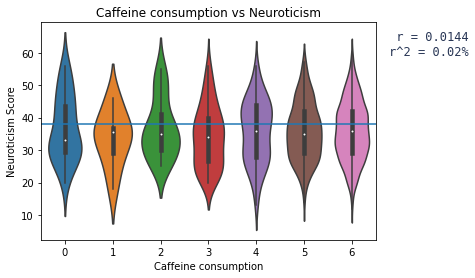

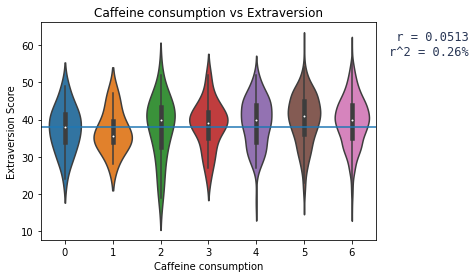

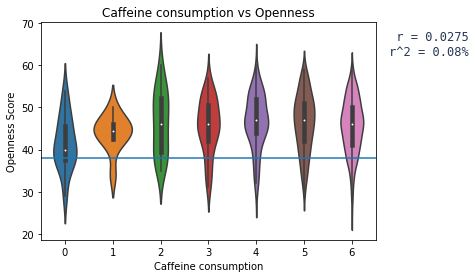

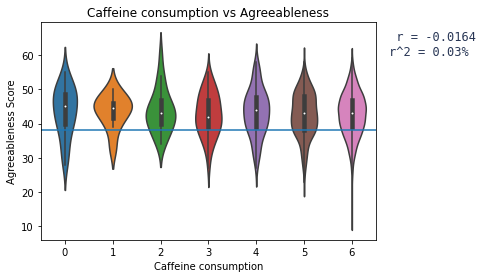

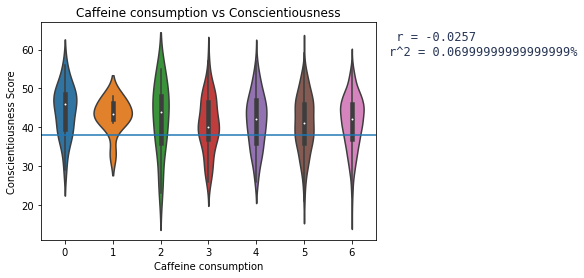

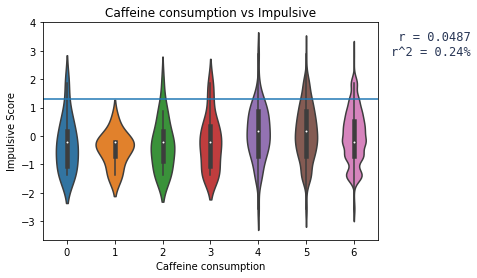

In [59]:
# calls the violin function to make plots for Caff consumption
caff = violin('Caffeine consumption')

For people that consumed caffeine more frequently, the concentration of neuroticism scores were more spread out but most concentrated around 30. The correlation was positive and very weak and more frequent caffeine consumption accounted for .02% of the neroticism score. People who consumed caffeine more frequently had extraversion scores concentrated around 40. The correlation was positive and very weak and frequent caffeine use accounted for .26% of the extraversion score. People who drank caffeine frequently concentration of openness scores were very spread out but overall above average. The correlation between frequent caffeine consumption and openness to experience was positive and very weak. Frequent caffeine intake accounted for .08% of the openness score. People who drank caffeine frequently had agreeableness scores concentrated around 40. The correlation was negative and very weak and frequency of drinking caffeine could account for only .03% of the agreeableness score. People who drank caffeine more frequently were slightly less conscientiousness compared to everyone else with scores concentrated around 41 or 42. The correlation was negative and very weak and the frequent use of caffeine accounted for .07% of the conscientiousness score. Finally, people who drank caffeine more often scores for impulsiveness were more concentrated by 0. The correlation was positive and very weak. The frequency of drinking caffeine accounts for .24% of the score for impulsiveness.

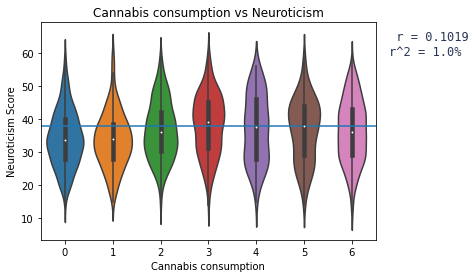

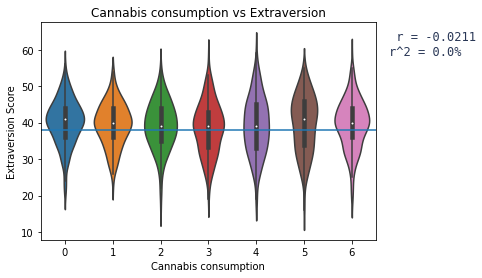

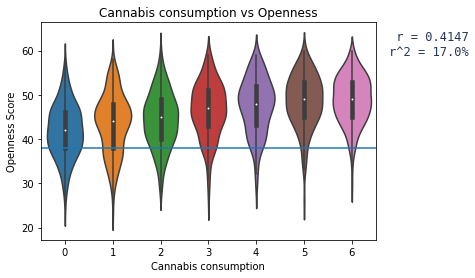

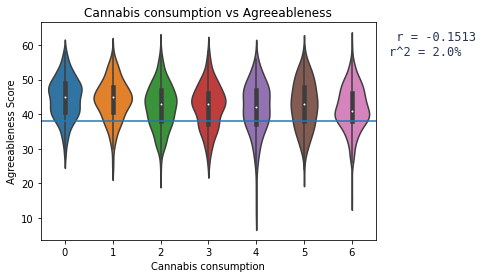

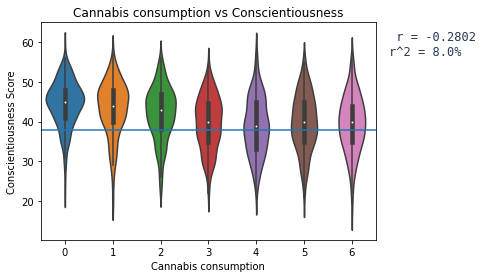

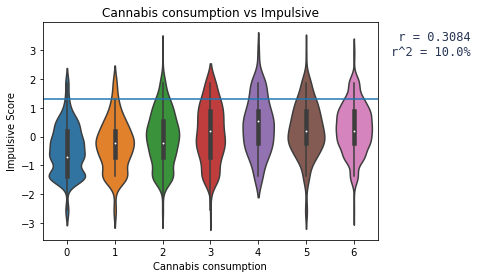

In [50]:
# calls the violin function to make plots for Weed consumption
weed = violin('Cannabis consumption')

For people that took weed more frequently, the concentration of neuroticism scores were most concentrated around 40. The correlation was positive and very weak and more frequent weed consumption accounted for 1% of the neroticism score. People who consumed weed more frequently had extraversion scores concentrated around 42 or 43. The correlation was negative and very weak and frequent weed use accounted for 0% of the extraversion score. People who had weed frequently concentration of openness scores were well above average and concentrated around 50. The correlation between frequent weed consumption and openness to experience was positive and weak being .41 (but stronger than most other relationships in these plots). Frequent weed intake accounted for 17% of the openness score. People who took weed frequently had agreeableness scores concentrated around 41. The correlation was negative and very weak and frequency of intaking weed could account for 2% of the agreeableness score. People who had weed more frequently were less conscientiousness compared to everyone else with scores concentrated around 38 or 40. The correlation was negative and very weak and the frequent use of weed accounted for 8% of the conscientiousness score. Finally, people who had weed more often scores for impulsiveness were more concentrated by .5. The correlation was positive and weak. The frequency of having weed accounts for 10% of the score for impulsiveness.

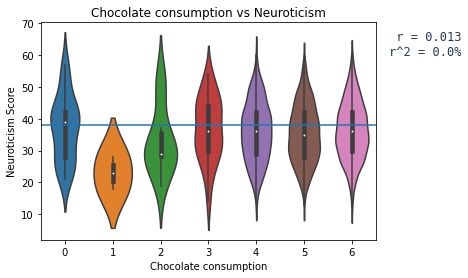

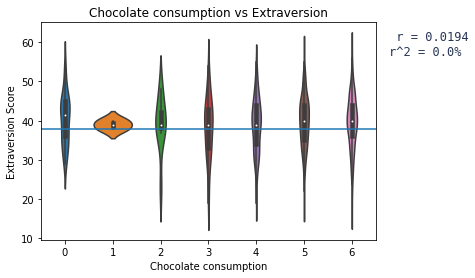

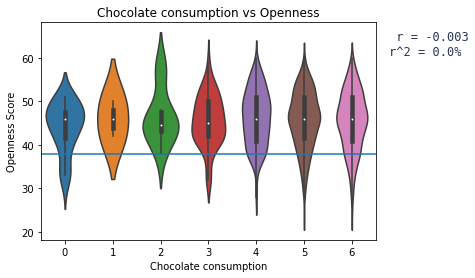

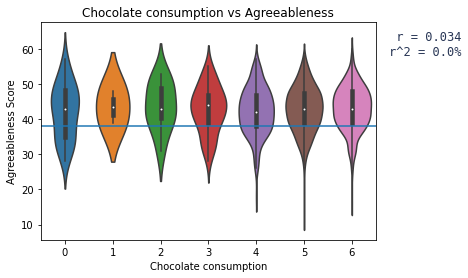

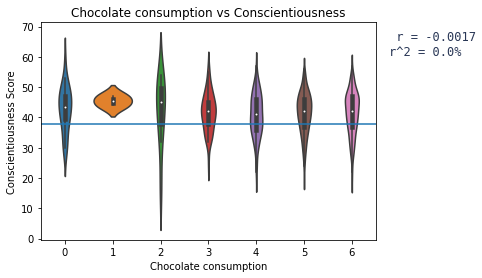

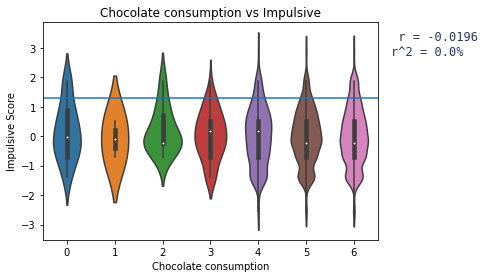

In [51]:
# calls the violin function to make plots for Choc consumption
choc = violin('Chocolate consumption')

For people that ate chocolate more frequently, the concentration of neuroticism scores were spread out but most concentrated around 37. The correlation was positive and very weak and more frequent chocolate consumption accounted for 0% of the neroticism score. People who consumed chocolate more frequently had a very spread out concentration of extraversion scores. The correlation was positive and very weak and frequent chocolate intake accounted for 0% of the extraversion score. People who ate chocolate frequently concentration of openness scores concentrated around 47. The correlation between frequent chocolate consumption and openness to experience was negative and very weak. Frequent chocolate intake accounted for 0% of the openness score. People who ate chocolate frequently had agreeableness scores concentrated around 43. The correlation was positive and very weak and frequency of intaking chocolate could account for 0% of the agreeableness score. People who had chocolate more frequently conscientiousness scores were very spread out. The correlation was negative and very weak and the frequent use of chocolate accounted for 0% of the conscientiousness score. Finally, people who ate chocolate more often scores for impulsiveness were more concentrated by -.5. The correlation was negative and very weak. The frequency of having chocolate accounts for 0% of the score for impulsiveness.

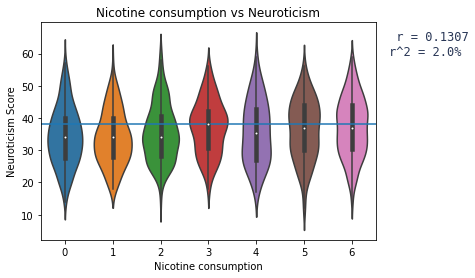

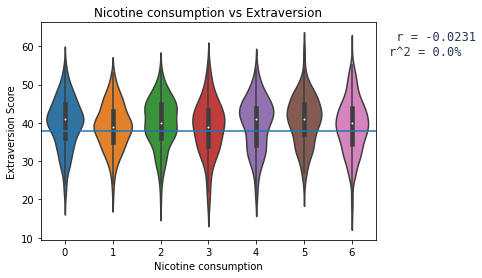

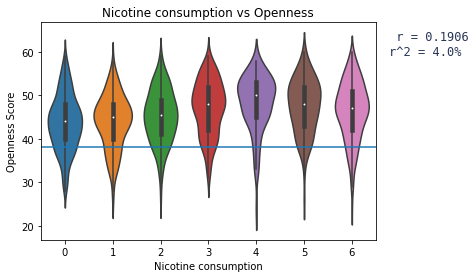

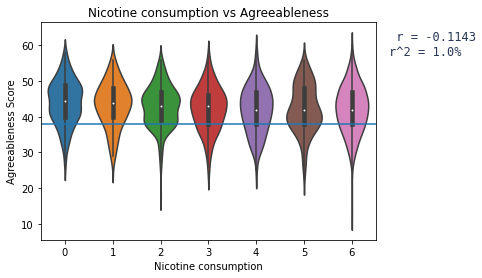

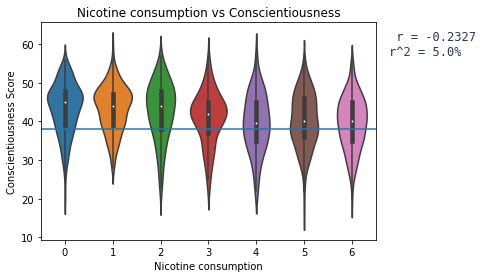

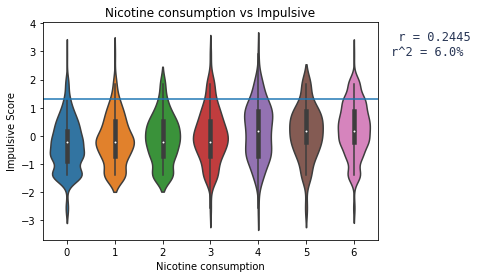

In [52]:
# calls the violin function to make plots for Nic consumption
nic = violin('Nicotine consumption')

For people that took nicotine more frequently, the concentration of neuroticism scores were most concentrated around 37. The correlation was positive and very weak and more frequent nicotine consumption accounted for 2% of the neroticism score. People who had nicotine more frequently had extraversion scores concentrated around 42. The correlation was negative and very weak and frequent nicotine use accounted for 0% of the extraversion score. People who had nicotine frequently concentration of openness scores were well above average and concentrated around 50. The correlation between frequent nicotine consumption and openness to experience was positive and weak. Frequent nicotine intake accounted for 4% of the openness score. People who took nicotine frequently had agreeableness scores concentrated around 42. The correlation was negative and very weak and frequency of intaking nicotine could account for 1% of the agreeableness score. People who had nicotine more frequently were less conscientiousness compared to everyone else with scores concentrated around 38. The correlation was negative and very weak and the frequent use of nicotine accounted for 5% of the conscientiousness score. Finally, people who had nicotine more often scores for impulsiveness were more concentrated around 0. The correlation was positive and weak. The frequency of having nicotine accounts for 6% of the score for impulsiveness.

So in conclusion, how high were people in 2015? Pretty high but not as high as I thought.